In [9]:
#解决中文乱码
import numpy as np 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [11]:
#删除奇数行
nums=[i for i in range(2137) if i%2 !=0]
data.drop(nums,inplace=True)

In [12]:
# 读文件
import pandas as pd
df = pd.read_csv(r'D:\瓜子二手车.csv', sep=',')

# 打印原始基本信息
print("original data rowCount: %d" % (df.shape[0]))
print("original data colCount: %d" % (df.shape[1]))
print(df.dtypes)

# 去除Nan数据和重复数据
df.dropna(inplace=True)
df.drop_duplicates(keep="first", inplace=True)

# 去除未知、暂无数据、车位、别墅
df = df[df["城市"] != ""]
df = df[df["名称"] != ""]
df = df[df["上牌时间"] != "None"]
df = df[df["品牌"] != ""]
df = df[df["表显里程"] != ""]
df = df[df["排量"] != ""]
df = df[df["变速箱"] != ""]
df = df[df["售价"] != ""]
df = df[df["排放标准"] != ""]
df = df[df["过户次数"] != ""]
df = df[df["使用性质"] != ""]
df = df[df["产权性质"] != ""]
df = df[df["看车方式"] != ""]
df = df[df["异常点"] != ""]
df = df[df["车长/宽/高"] != ""]
df = df[df["轴距"] != ""]
#df = df[df["deal_time"].str.len() <= 10]

# 打印清洗后的基本信息
print("cleaned data rowCount: %d" % (df.shape[0]))
print("cleaned data colCount: %d" % (df.shape[0]))

# 输出清洗完成的数据
df.to_csv("D:\瓜子二手车.csv", index=False)

original data rowCount: 8253
original data colCount: 27
城市         object
名称         object
上牌时间        int64
品牌         object
表显里程      float64
排量        float64
变速箱        object
原价        float64
售价        float64
排放标准       object
过户次数        int64
使用性质       object
产权性质       object
看车方式       object
异常点         int64
车长/宽/高     object
轴距         object
行李箱容积      object
整备质量       object
进气形式       object
气缸数        object
最大马力        int64
最大扭矩       object
燃料类型       object
燃油标号       object
供油方式       object
车龄          int64
dtype: object
cleaned data rowCount: 5508
cleaned data colCount: 5508


In [31]:
#缺失值
data.isnull().sum()

城市           0
名称           0
上牌时间         0
品牌           0
表显里程         0
排量           0
变速箱          0
原价        2335
售价           0
排放标准         0
过户次数         0
使用性质         0
产权性质         0
看车方式         0
异常点          0
车长/宽/高       0
轴距           0
行李箱容积       33
整备质量         0
进气形式         0
气缸数          0
最大马力         0
最大扭矩         0
燃料类型         0
燃油标号         0
供油方式         0
车龄           0
dtype: int64

In [32]:
len(data)

7185

In [33]:
#杭州二手车
(data.城市.str.contains('杭州')).sum()

106

In [34]:
#里程从大到小
data.sort_values('表显里程',ascending=False)

,城市,名称,上牌时间,品牌,表显里程,排量,变速箱,原价,售价,排放标准,...,行李箱容积,整备质量,进气形式,气缸数,最大马力,最大扭矩,燃料类型,燃油标号,供油方式,车龄
2268,上海,别克 英朗 2013款 GT 1.6L 自动时尚版,2013,别克,28.15,1.6,自动,NaN,5.20,国五,...,455,1410,自然吸气,4缸,121,150,汽油,92号,多点电喷,8
5744,重庆,雷克萨斯NX 2015款 200t 全驱 锋尚版,2015,雷克萨斯NX,20.00,2.0,自动,43.20,19.88,国五,...,500,1810,涡轮增压,4缸,238,350,汽油,95号,混合喷射,6
2582,东莞,别克GL8 2011款 3.0L XT豪华商务旗舰版,2011,别克GL8,20.00,3.0,自动,42.12,12.98,国四,...,-,1930,自然吸气,6缸,258,290,汽油,92号,直喷,10
696,重庆,宝马5系 2013款 520Li 典雅型,2013,宝马5系,20.00,2.0,自动,46.52,17.60,国四,...,520,1725,涡轮增压,4缸,184,270,汽油,95号,直喷,8
666,苏州,宝马5系 2011款 535i 豪华运动型(进口),2011,宝马5系,20.00,3.0,自动,NaN,18.00,国四,...,520,1775,涡轮增压,6缸,306,400,汽油,95号,直喷,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,上海,玛莎拉蒂Ghibli 2021款 2.0T MHEV,2021,玛莎拉蒂Ghibli,0.01,2.0,自动,NaN,73.98,国六,...,-,-,涡轮增压,4缸,330,450,汽油+48V轻混系统,95号,直喷,0
1170,郑州,奔驰E级 2021款 改款 E 300 L 豪华型,2021,奔驰E级,0.01,2.0,自动,NaN,50.50,国六,...,-,-,涡轮增压,4缸,258,370,汽油,95号,直喷,0
6010,石家,马自达CX-4 2020款 2.0L 自动两驱蓝天品位版,2020,马自达CX-4,0.01,2.0,自动,18.43,14.80,国六,...,-,1493,自然吸气,4缸,158,202,汽油,92号,直喷,1
1862,石家,本田XR-V 2021款 220TURBO CVT舒适版,2021,本田XR-V,0.01,1.5,自动,16.27,14.20,国六,...,-,1385,涡轮增压,4缸,177,220,汽油,92号,直喷,0


In [35]:
#重新排序Index,并删除原索引
data = data.reset_index(drop=True)

In [36]:
#描述性数据
data.describe()

,上牌时间,表显里程,排量,原价,售价,过户次数,异常点,最大马力,车龄
count,7185.000000,7185.000000,7185.000000,4850.000000,7185.000000,7185.000000,7185.0,7185.000000,7185.000000
mean,2014.546138,6.895140,1.773194,21.516584,9.649905,0.692136,0.0,150.302853,6.453862
std,2.943911,3.822795,0.681053,16.554539,7.976093,0.951570,0.0,45.850906,2.943911
min,2005.000000,0.010000,1.000000,3.580000,0.780000,0.000000,0.0,61.000000,0.000000
25%,2012.000000,4.100000,1.500000,12.570000,5.080000,0.000000,0.0,116.000000,4.000000
50%,2015.000000,6.450000,1.600000,16.260000,7.380000,0.000000,0.0,140.000000,6.000000
75%,2017.000000,9.100000,2.000000,25.810000,11.580000,1.000000,0.0,170.000000,9.000000
max,2021.000000,28.150000,20.000000,388.600000,99.990000,9.000000,0.0,560.000000,16.000000


<AxesSubplot:title={'center':'行驶里程直方图'}, ylabel='Frequency'>

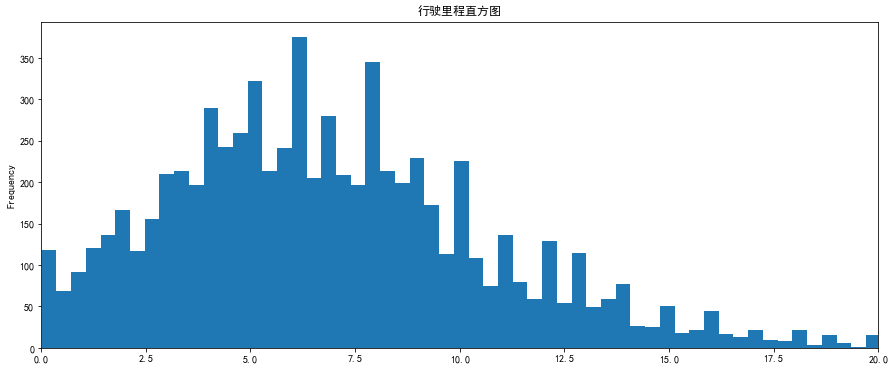

In [37]:
sub=[0,3,6,7,12,20]
y=[0,10,20,30,40,50,60,70,80,90]
#pb.cut(data.表显里程，sub).value_counts().plit.bar(rot=0,title='行驶里程分析')
#rot是X轴进行旋转
data['表显里程'].plot(kind='hist',bins=80,figsize=(15,6),xlim=[0,20],title='行驶里程直方图')
#,color=['slateblue','darkslateblue','mediumslateblue','mediumpurple','indigo'],alpha=0.6

<Figure size 360x504 with 0 Axes>

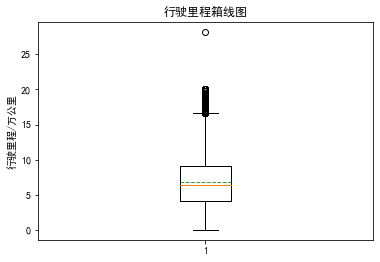

In [38]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7))
fig = plt.figure()
plt.boxplot(x=data['表显里程'],showmeans=True,meanline=True)
plt.title('行驶里程箱线图')
plt.ylabel('行驶里程/万公里')
plt.show()

<AxesSubplot:title={'center':'价格分析'}>

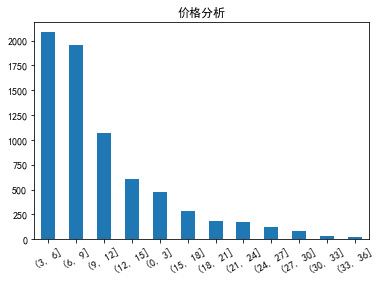

In [39]:
sub=[0,3,6,9,12,15,18,21,24,27,30,33,36]
pd.cut(data.售价,sub).value_counts().plot.bar(rot=30,title='价格分析')

<AxesSubplot:title={'center':'二手车各价格区间在售数量图'}, ylabel='Frequency'>

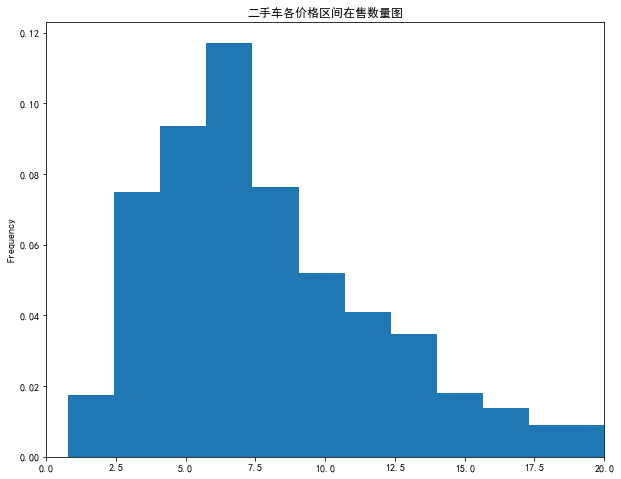

In [40]:
data['售价'].plot(kind='hist',bins=60,figsize=(10,8),density=True,sharex=False,xlim=[0,20],title='二手车各价格区间在售数量图')
#改成饼图

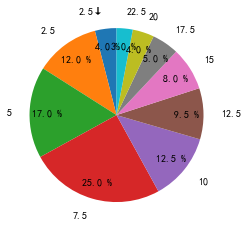

In [41]:
import numpy as np
import matplotlib.pyplot as plt
labels = '2.5↓','2.5','5','7.5','10','12.5','15','17.5','20','22.5'
fracs = [4,12,17,25,12.5,9.5,8,5,4,3]
explode = [0,0,0,0,0,0,0,0,0,0] # 0.1 凸出这部分，
plt.axes(aspect=1) # set this , Figure is round, otherwise it is an ellipse
# autopct ，show percet
plt.pie(x=fracs,labels=labels,explode=explode,autopct='%3.1f %%',
    shadow=False,labeldistance=1.2,startangle=90,pctdistance=0.8 )
'''
labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
shadow，饼是否有阴影
startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
pctdistance，百分比的text离圆心的距离
patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
'''
plt.show()

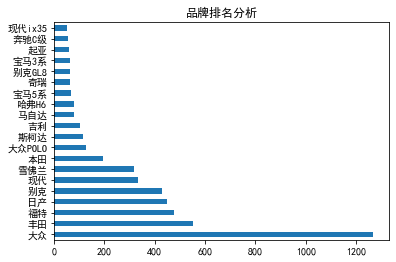

In [42]:
 # 品牌分析
data['品牌'] = data.名称.map(lambda x:x.split(' ')[0])
# 品牌排名前20
data.品牌.value_counts()[:20].plot.barh(title='品牌排名分析')
plt.show()

In [43]:
data['表显里程'].groupby(data['品牌']).agg(['mean',
                                   'max','median','count']).loc[['雪佛兰','大众','日产']]

,mean,max,median,count
品牌,,,,
雪佛兰,6.708396,18.00,6.465,318
大众,7.517618,18.66,7.230,1268
日产,6.635705,19.02,6.200,447


<AxesSubplot:xlabel='品牌'>

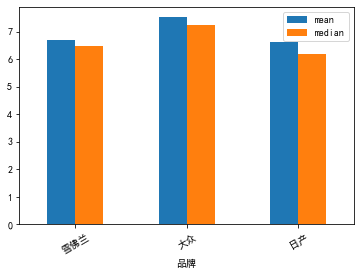

In [44]:
data['表显里程'].groupby(data['品牌']).agg(['mean','median']).loc[['雪佛兰','大众','日产']].plot(kind='bar',rot=30)

In [45]:
#地区 品牌 数量
data.groupby(['城市','品牌'])['品牌'].count()

城市  品牌   
上海  上汽大通      2
    丰田        2
    别克       11
    大众       28
    大众CC      1
             ..
鞍山  大众        3
    奥迪A3      1
齐齐  奥迪A4L     3
    日产        2
    本田        1
Name: 品牌, Length: 2006, dtype: int64

In [46]:
top10=['大众','福特','丰田','宝马5系','别克','上汽大通','奔驰','雪佛兰','现代','日产']
data_top10=data[data['品牌'].isin(top10)]
print(data_top10.shape)
print('top10二手汽车占总二手车比例：%.2f%%'%((data_top10.shape[0]/data.shape[0])*100))

(3897, 27)
top10二手汽车占总二手车比例：54.24%


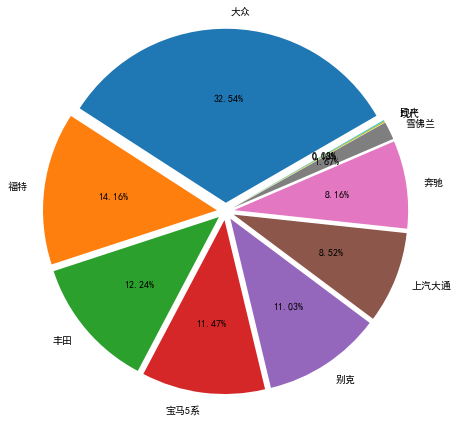

In [47]:
# 饼图
# 横纵轴标准化处理，保证饼图是正圆，默认为椭圆
plt.axes(aspect='equal')
plt.pie(data_top10['品牌'].value_counts(),explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],startangle=30,labels=top10,autopct='%.2f%%',radius=2)
plt.show()

Text(0, 0.5, '车辆总数')

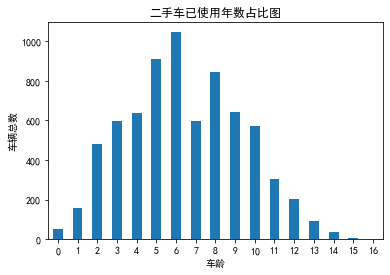

In [48]:
# 车龄分析
data['上牌时间'].groupby(data['车龄']).count().plot(kind='bar',rot=0,title='二手车已使用年数占比图')
plt.xlabel("车龄")
plt.ylabel("车辆总数")

In [49]:
#将数据按照车龄升序排列
data.sort_values(by="车龄",inplace=True)
data.head()

,城市,名称,上牌时间,品牌,表显里程,排量,变速箱,原价,售价,排放标准,...,行李箱容积,整备质量,进气形式,气缸数,最大马力,最大扭矩,燃料类型,燃油标号,供油方式,车龄
585,郑州,奔驰E级 2021款 改款 E 300 L 豪华型,2021,奔驰E级,0.01,2.0,自动,NaN,50.50,国六,...,-,-,涡轮增压,4缸,258,370,汽油,95号,直喷,0
1049,中山,别克 英朗 2021款 18T 自动轻混动精英型,2021,别克,0.68,1.3,自动,NaN,7.68,国六,...,-,1285,涡轮增压,3缸,163,230,汽油+48V轻混系统,92号,多点电喷,0
3090,北京,东南A5翼舞 2021款 1.5L 手动翼豪版,2021,东南A5翼舞,0.60,1.5,手动,NaN,5.28,国六,...,-,1210,自然吸气,4缸,120,143,汽油,92号,多点电喷,0
1535,武汉,别克GL8 2021款 陆上公务舱 652T 尊贵型,2021,别克GL8,0.93,2.0,自动,NaN,28.00,国六,...,475-1605,1900,涡轮增压,4缸,237,350,汽油,95号,直喷,0
4976,上海,玛莎拉蒂Levante 2021款 3.0T 标准版,2021,玛莎拉蒂Levante,0.01,3.0,自动,NaN,95.98,国六,...,580,2109,双涡轮增压,6缸,350,500,汽油,95号,直喷,0


<AxesSubplot:>

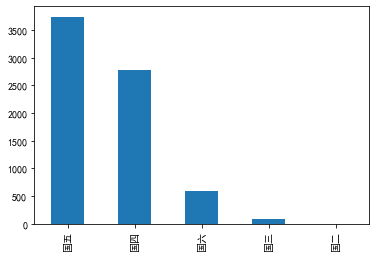

In [50]:
#排放标准
discharge = data['排放标准'].value_counts()
discharge.plot(kind = 'bar')

Text(0, 0.5, '车辆总数')

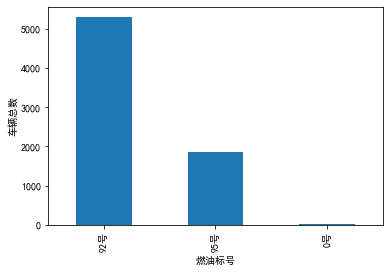

In [51]:
#排放标准
discharge = data['燃油标号'].value_counts()
discharge.plot(kind = 'bar')
plt.xlabel('燃油标号')
plt.ylabel('车辆总数')

In [52]:
import pandas as pd # panda库
from sklearn.preprocessing import MinMaxScaler # 标准化库
from sklearn.cluster import KMeans  # 导入sklearn聚类模块
from sklearn.metrics import silhouette_score  # 效果评估模块
#解决中文乱码
import numpy as np 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [53]:
cluster_data = pd.read_csv('D:\瓜子.csv',index_col='车龄')
print(cluster_data.head(3))

    上牌时间  表显里程   排量     售价
车龄                        
3   2018  2.85  2.0  12.00
12  2015  7.30  1.5   6.58
3   2018  3.03  1.5   8.80


In [54]:
scaler = MinMaxScaler() 
scaled_features = scaler.fit_transform(cluster_data) # 标准化  
print(scaled_features[:2,:]) 


[[0.8125     0.10092395 0.05263158 0.11309344]
 [0.625      0.25906183 0.02631579 0.05846185]]


In [55]:
model_kmeans = KMeans(n_clusters=3, random_state=0)  # 建立聚类模型对象
model_kmeans.fit(scaled_features)  # 训练聚类模型

KMeans(n_clusters=3, random_state=0)

In [56]:
n_samples, n_features = cluster_data.shape  # ①
print('samples: %d \t features: %d' % (n_samples, n_features))  # ②

silhouette = silhouette_score(scaled_features, model_kmeans.labels_, metric='euclidean')  # ③使用轮廓系数（Silhouette）检验聚类模型的质量结果

print('silhouette score:',silhouette)  # ④


samples: 8243 	 features: 4
silhouette score: 0.3374857199478652


In [57]:
kmeans_labels = pd.DataFrame(model_kmeans.labels_,index=cluster_data.index,columns=['labels'])  # ①

kmeans_data = pd.concat((cluster_data,kmeans_labels),axis=1)  # ②将原始数据框和聚类结果数据框按列合并

print(kmeans_data.head(3))  # ③


    上牌时间  表显里程   排量     售价  labels
车龄                                
3   2018  2.85  2.0  12.00       2
12  2015  7.30  1.5   6.58       0
3   2018  3.03  1.5   8.80       2


In [58]:
radar_gb = kmeans_data.groupby('labels',as_index=False).mean()
print(radar_gb)


   labels         上牌时间       表显里程        排量         售价
0       0  2014.706239   6.543050  1.733102   9.676438
1       1  2011.131811  11.032800  1.991426   7.833958
2       2  2018.054267   3.169116  1.669147  14.572495


<AxesSubplot:title={'center':'不同聚类分组结果对比'}, xlabel='labels'>

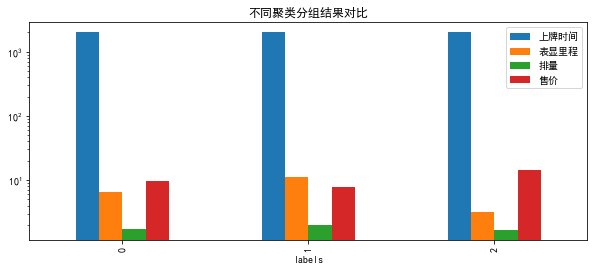

In [59]:
radar_gb.plot(kind='bar', x='labels',y=['上牌时间','表显里程','排量','售价'], figsize=(10, 4),logy=True, title='不同聚类分组结果对比')
